In [11]:
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv('censusCrimeClean.csv')

data.head()

,communityname,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
0,Lakewoodcity,1,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,...,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20,0.20
1,Tukwilacity,1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,...,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45,0.67
2,Aberdeentown,1,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,...,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02,0.43
3,Willingborotownship,1,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,...,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28,0.12
4,Bethlehemtownship,1,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,...,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02,0.03


In [12]:
column_names = list(data.select_dtypes('float64'))
column_names

['population',
 'householdsize',
 'racepctblack',
 'racePctWhite',
 'racePctAsian',
 'racePctHisp',
 'agePct12t21',
 'agePct12t29',
 'agePct16t24',
 'agePct65up',
 'numbUrban',
 'pctUrban',
 'medIncome',
 'pctWWage',
 'pctWFarmSelf',
 'pctWInvInc',
 'pctWSocSec',
 'pctWPubAsst',
 'pctWRetire',
 'medFamInc',
 'perCapInc',
 'whitePerCap',
 'blackPerCap',
 'indianPerCap',
 'AsianPerCap',
 'OtherPerCap',
 'HispPerCap',
 'NumUnderPov',
 'PctPopUnderPov',
 'PctLess9thGrade',
 'PctNotHSGrad',
 'PctBSorMore',
 'PctUnemployed',
 'PctEmploy',
 'PctEmplManu',
 'PctEmplProfServ',
 'PctOccupManu',
 'PctOccupMgmtProf',
 'MalePctDivorce',
 'MalePctNevMarr',
 'FemalePctDiv',
 'TotalPctDiv',
 'PersPerFam',
 'PctFam2Par',
 'PctKids2Par',
 'PctYoungKids2Par',
 'PctTeen2Par',
 'PctWorkMomYoungKids',
 'PctWorkMom',
 'NumIlleg',
 'PctIlleg',
 'NumImmig',
 'PctImmigRecent',
 'PctImmigRec5',
 'PctImmigRec8',
 'PctImmigRec10',
 'PctRecentImmig',
 'PctRecImmig5',
 'PctRecImmig8',
 'PctRecImmig10',
 'PctSpeakEng

In [13]:
med_income = data.medIncome

crimes_per_pop = data.ViolentCrimesPerPop

pct_black = data.racepctblack

poverty = data.PctPopUnderPov

In [14]:
pearson = scipy.stats.pearsonr(poverty, data.ViolentCrimesPerPop)

pearson

PearsonRResult(statistic=0.5218765412717721, pvalue=1.0136557614723564e-139)

In [15]:
spearman = scipy.stats.spearmanr(poverty, data.ViolentCrimesPerPop)

spearman

SignificanceResult(statistic=0.619226147205437, pvalue=1.8826522884761213e-211)

<Axes: xlabel='PctPopUnderPov', ylabel='ViolentCrimesPerPop'>

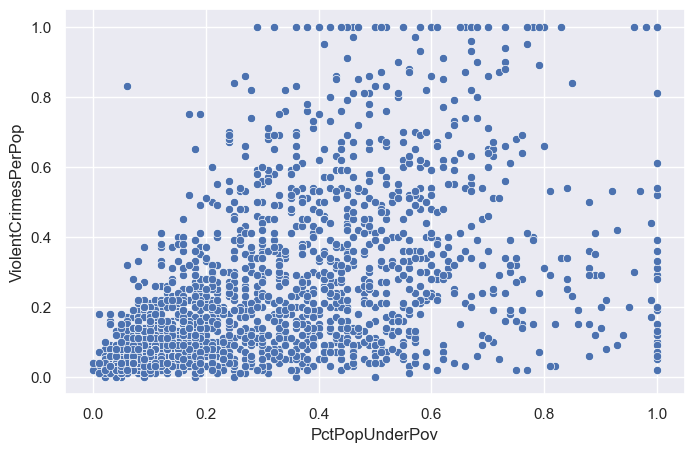

In [16]:
sns.scatterplot(x=poverty, y=crimes_per_pop)

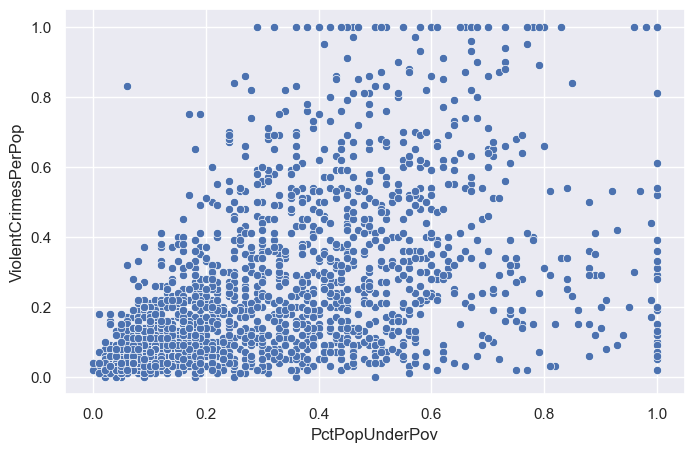

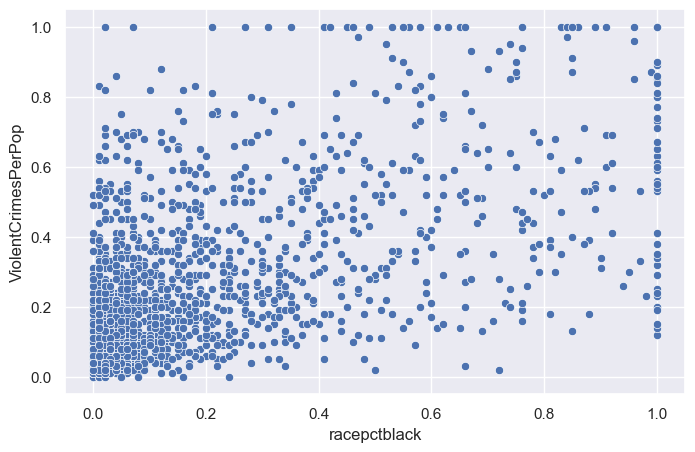

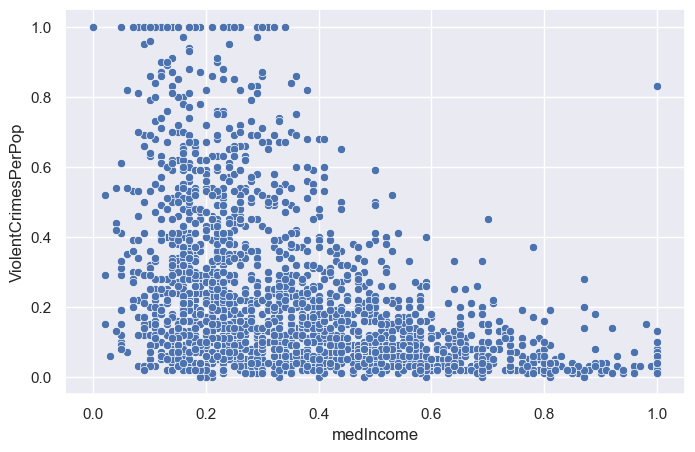

In [17]:
x_list = [poverty, pct_black, med_income]

for x in x_list:
    plt.figure()
    sns.scatterplot(x=x, y=crimes_per_pop)

In [18]:
# for column in column_names:
    
#     plt.figure()
#     plt.tight_layout()
    
#     sns.set(rc={'figure.figsize': (8, 5)})
    
#     f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
#     plt.gca().set(xlabel= column, ylabel='Frequency')
#     sns.boxplot(data[column], ax=ax_box, linewidth= 1.0)
#     sns.histplot(data[column], ax=ax_hist, bins = 10, kde=True)


# # sns.__version__

In [84]:
heart = pd.read_csv('heart.csv')

heart['gender'] = heart.apply(lambda row: 'female' if row['sex'] == 0 else 'male', axis=1)
    
heart['hasHeartDisease'] = heart.apply(lambda row: 1 if row['target'] == 0 else 0, axis=1)

heart.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,gender,hasHeartDisease
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,male,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,male,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,female,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,male,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,female,0


In [127]:
mean = heart.groupby('hasHeartDisease').trestbps.mean()

sd = heart.groupby('hasHeartDisease').trestbps.std()

mean[1]

134.3985507246377

In [110]:
has_heart_disease = heart.loc[heart['hasHeartDisease'] == 1]

not_heart_disease = heart.loc[heart['hasHeartDisease'] == 0]



In [ ]:
sns.histplot(data=heart, x='trestbps', bins=10, legend='hasHeartDisease');

c:\Users\Chris Henry\miniconda3\Lib\site-packages\seaborn\axisgrid.py:712: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


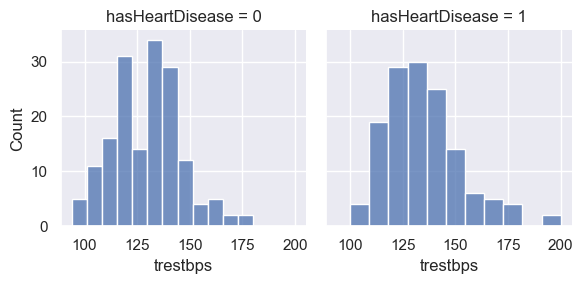

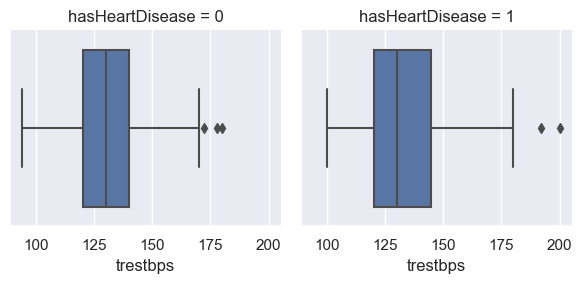

In [122]:
g = sns.FacetGrid(heart, col='hasHeartDisease')
g.map(sns.histplot, 'trestbps')
d = sns.FacetGrid(heart, col='hasHeartDisease')
d.map(sns.boxplot, 'trestbps');


In [132]:
test = scipy.stats.ttest_ind(has_heart_disease.trestbps, not_heart_disease.trestbps)


test

TtestResult(statistic=2.5412927171039, pvalue=0.011546059200233312, df=301.0)

In [142]:
from numpy import std, mean, sqrt
x=has_heart_disease.trestbps
y=not_heart_disease.trestbps

def cohen_d(x,y):
    nx= len(x)
    ny = len(y)
    
    dof = nx + ny - 2
    
    return(mean(x) - mean(y)) / sqrt(((nx-1)* std(x, ddof=1) **2 + (ny-1)* std(y, ddof=1) ** 2) /dof)


if len(x) != len(y):

    d = (mean(x) - mean(y)) / sqrt((std(x, ddof=1) ** 2 + std(y, ddof=1) ** 2) / 2.0)

else:
    d = cohen_d(x, y)
    
d

0.29122794740288344

In [145]:
hasDiseaseCount = heart[heart.hasHeartDisease==True].groupby('gender').count().hasHeartDisease

hasDiseaseCount

gender
female     24
male      114
Name: hasHeartDisease, dtype: int64

In [150]:
total_male = 114+93
total_female = 24+72


p_male = 114/ total_male
p_female = 24 / total_female



In [154]:

se_male = sqrt(p_male * (1 - p_male) / total_male)

se_female = sqrt(p_female * (1 - p_female) / total_female)

se_diff = sqrt(se_female**2 + se_male**2)

se_diff, se_female, se_male, p_female, p_male

(0.05611082400648334,
 0.04419417382415922,
 0.0345731047302169,
 0.25,
 0.5507246376811594)

In [155]:
d = p_male - p_female

lcb = d - 1.96 * se_diff

ucb = d + 1.96 * se_diff

lcb, ucb

(0.19074742262845207, 0.4107018527338668)